# Logistic Regression 

## import library

In [605]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [606]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [607]:
def linear_regression(x,y,theta):
    value = np.dot(theta, np.array([np.ones(x.size),x,y]))

    return value

## define sigmoid function with input $x$

In [608]:
def sigmoid(x,y,theta):
    
    f = linear_regression(x,y,theta)
    
    z = 1/(1+np.exp(-f))


    return z

## define loss function for the logistic regression

In [609]:
def compute_loss(x,y,label,theta):
    h = sigmoid(x,y,theta)
    t = 0.00001
    loss = 0
    
    loss = -((1/num_data)* (np.dot(label, np.log(h + t) ) + np.dot((1-label),np.log(1-h + t) )  ))
    
    return loss


## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [610]:
def compute_gradient(x,y,label,theta):
    
    X = np.array([np.ones(x.size),x,y]) #(3,600)

    h = sigmoid(x,y,theta) 
    l = label
   
    gradient = (1/num_data)*np.dot(X,(h-l))

    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [611]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters

theta_iteration =np.zeros((num_iteration, theta.size))
loss_iteration = np.zeros(num_iteration, dtype=object)

## iterations for the gradient descent

In [612]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient(point_x,point_y,label,theta)
    loss = compute_loss(point_x,point_y,label,theta)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    
    #print("loss",loss_iteration[i]," theta",theta_iteration[i])


## plot the results

In [613]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')


    plt.plot(loss_iteration, color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [614]:
def plot_data(label):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')
    
    
    plt.scatter(data[:, 0][label == 1],data[:, 1][label == 1], c="r", marker=".", label="class 1 ")
    
    plt.scatter(data[:, 0][label == 0],data[:, 1][label == 0], c="b", marker=".", label="class 0 ")



    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [615]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    plt.plot(theta_iteration[:,0],color = 'red' , label = "theta0")
    plt.plot(theta_iteration[:,1],color = 'green', label = "theta1")
    plt.plot(theta_iteration[:,2],color = 'blue' , label = "theta2")

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [616]:

def plot_classifier(point_x,point_y,theta,label):
    plt.figure(figsize=(10,10))
    
    #plot_x = np.array([min(point_x) - 2, max(point_x) + 2])
    
    t = 0.01
    x_min, x_max = point_x.min() - .1, point_x.max() + .1
    y_min, y_max = point_y.min() - .1, point_y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))

    X = xx.ravel()
    Y = yy.ravel()

    #h = sigmoid(X,Y,theta)
    h = linear_regression(X,Y,theta)
    # align the shape of Z with xx
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z, levels = 90,cmap="RdBu_r")
    plt.colorbar(cntr)    
    

    plt.scatter(data[:, 0][label == 1],data[:, 1][label == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label == 0],data[:, 1][label == 0], c="b", marker=".",label="class 0 ")
    
    plot_x = np.array([min(point_x), max(point_x)])
    plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y, color = 'black', label = "Decision_Boundary")
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

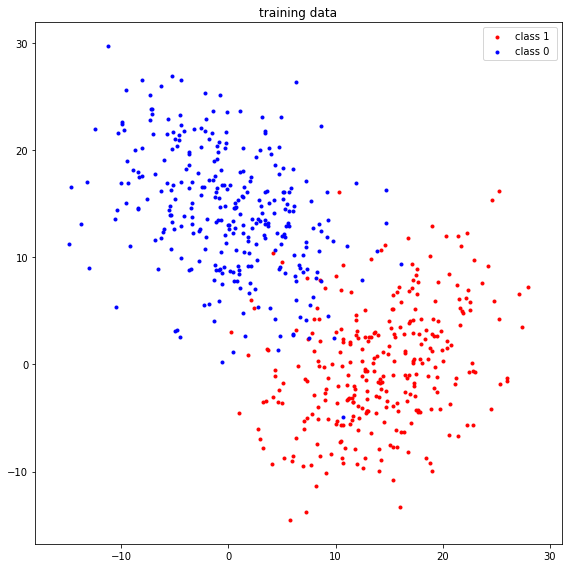

In [617]:
plot_data(label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

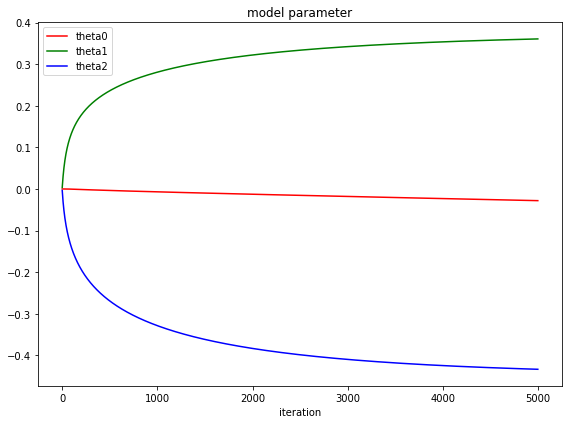

In [618]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

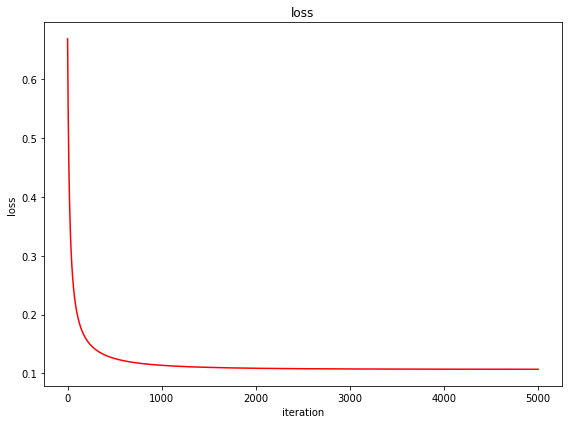

In [619]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

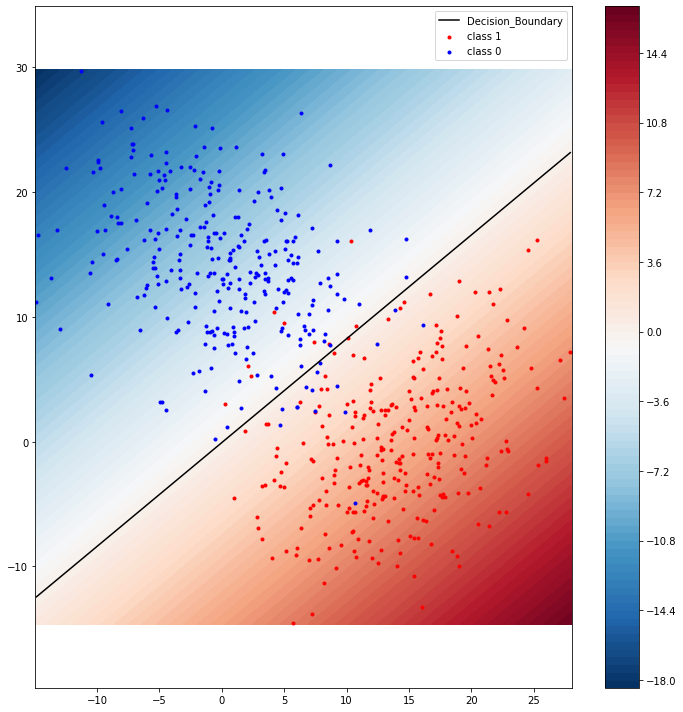

In [620]:
plot_classifier(point_x,point_y,theta,label)